# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Answer 
**To reframe the task as a data task, we need to translate the business problem of identifying key drivers for used car prices into a data problem definition. The data problem definition can be formulated as follows:**

**The goal of this data project is to analyze a dataset containing information on used cars and identify the variables that have the strongest impact on the prices of these cars. The key drivers of used car prices will be determined through exploratory data analysis, regression analysis, and feature selection techniques. The resulting insights will inform recommendations for the used car dealership on which factors to prioritize in their business strategy.**

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### here is a brief description of each column:

**id:** unique identifier for each car listing.

**region:** location of the car based on Craigslist region.

**price:** the asking price for the car.

**year:** the year the car was manufactured.

**manufacturer:** the brand of the car's manufacturer.

**model:** the model name or number of the car.

**condition:** overall condition of the car, such as new, like new, excellent, good, fair, or salvage.

**cylinders:** the number of cylinders in the car's engine.

**fuel:** type of fuel the car uses, such as gas, diesel, hybrid, electric, or other.

**odometer:** the number of miles the car has been driven.

**title_status:** the status of the car's title, such as clean, salvage, rebuilt, or missing.

**transmission:** type of transmission, such as automatic, manual, or other.

**VIN:** Vehicle Identification Number, a unique code assigned to each car.

**drive:** type of drive, such as 2-wheel drive, 4-wheel drive, or all-wheel drive.

**size:** size of the car, such as compact, mid-size, full-size, or SUV.

**type:** body type of the car, such as sedan, coupe, truck, van, or SUV.

**paint_color:** the color of the car.

**state:** state where the car is being sold.

By understanding the columns and their descriptions, we can start exploring the dataset to gain more insights.


**here are some steps that could be taken in the Data Understanding phase to get to know the dataset and identify any quality issues:**

1. **Obtain the dataset: Obtain the dataset from the source, in this case from Kaggle, and ensure that it is in a format that can be easily loaded into a data analysis tool.**

2. **Inspect the data: Inspect the dataset to get an initial sense of its size, structure, and variables. This could involve looking at the number of rows and columns, data types, and variable names.**

3. **Explore variable distributions: Use summary statistics, histograms, and boxplots to explore the distributions of the variables in the dataset. This can help identify any outliers or skewed distributions that may affect the accuracy of any models developed.**

4. **Identify missing values: Check for missing or null values in the dataset and consider how these values should be handled. Depending on the extent of the missing data, strategies such as imputation or exclusion of incomplete cases may be used.**

5. **Check for duplicates: Check for any duplicate entries in the dataset, as these can distort the results of any analyses.**

6. **Identify correlations: Examine correlations between variables in the dataset, as this can help to identify any potentially confounding variables or multicollinearity that may affect the accuracy of any regression analyses.**

7. **Identify data quality issues: As you go through the above steps, note any data quality issues you observe in the dataset, such as inconsistencies in variable names, units, or measurement scales. These issues should be documented and addressed in the Data Preparation phase.**

8. **By taking these steps in the Data Understanding phase, we can gain a deeper understanding of the data and identify any quality issues that need to be addressed before conducting further analyses. This will ensure that any findings from the data are reliable and accurate, and will help inform the subsequent phases of the CRISP-DM process.**

In [234]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [235]:
# Load the dataset
data = pd.read_csv('data/vehicles.csv')

In [236]:
# View the first few rows of the data
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [237]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [238]:
# Check for missing values
print(data.isnull().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [239]:
# Check for duplicates
print(data.duplicated().sum())

0


In [240]:
# Summary statistics for numerical variables
print(data.describe())

                 id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07


In [241]:
len(data[data['price']<100000])/len(data)

0.9983672226386806

In [242]:
# Outlier removal
data = data[data['price']<100000]
data = data[data['price']>0]

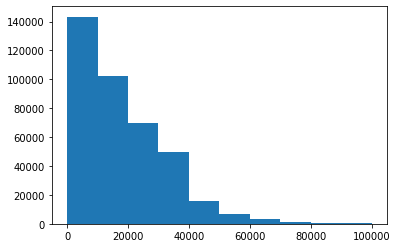

In [243]:
# Histogram of prices
plt.hist(data['price'])
plt.show()

## Observation. 
The dataset is left skewed, most of the cars are low priced, than 40,000 usd

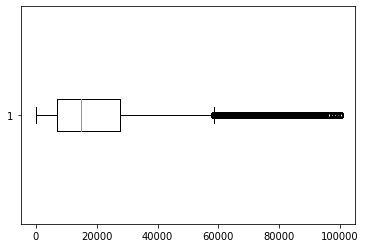

In [244]:
# Boxplot of prices by car brand
plt.boxplot(data['price'], vert=False)
plt.show()

## Observation:
boxplot shows most of the cars are less than 40,000 dollers, it is left skewed

In [245]:
# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

                id     price      year  odometer
id        1.000000 -0.075344 -0.063905  0.017060
price    -0.075344  1.000000  0.345558 -0.173353
year     -0.063905  0.345558  1.000000 -0.163718
odometer  0.017060 -0.173353 -0.163718  1.000000


##### Not so much correlation in this mattix

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

**Here are some steps that can be taken in the Data Preparation phase to construct the final dataset:**

1. Handle missing values: Depending on the extent of the missing data, we can either drop incomplete cases or impute missing values using strategies such as mean imputation, mode imputation, or regression imputation.
2. Remove duplicates: Remove any duplicate entries in the dataset.
3. Feature engineering: Create new features from the existing variables that may help to better predict the target variable, such as the age of the car or the average price of cars from the same brand.
4. Transform variables: Apply transformations such as scaling, logarithms, or normalization to the variables in the dataset, as this can help improve the accuracy of any models developed.
5. Encode categorical variables: Convert categorical variables into numerical variables that can be used in regression models using techniques such as one-hot encoding or label encoding.
6. Remove irrelevant variables: Remove any variables that are not useful in predicting the target variable, as these can lead to overfitting of the models.
7. Split the data into training and testing sets: Split the dataset into two parts, one for training the model and the other for testing the model's accuracy.
8. Save the final dataset: Save the cleaned and preprocessed dataset to a new file for future use.


Here is some example Python code that demonstrates some of the steps outlined in the Data Preparation phase:

In [246]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

**Cleaning and transforming data:** We need to check for any data integrity issues and clean the data by removing any duplicates, outliers, or irrelevant columns. We can also engineer new features from the existing columns, such as calculating the age of the car based on its manufacturing year and the current year. We can also transform some columns, such as scaling the odometer column or taking the logarithm of the price column to address skewness in the data.

In [247]:
# Drop irrelevant variables
data.drop(['id', 'VIN'], axis=1, inplace=True)

In [248]:
cols = data.columns[2:-1]

In [249]:
data['model'].value_counts()

f-150                      7115
silverado 1500             4546
1500                       3800
camry                      2827
silverado                  2779
                           ... 
avenger mainstreet heat       1
silverado lt w/1lt 4wd        1
silverado ltz 2500 hd         1
sienna se 8 passenger         1
Paige Glenbrook Touring       1
Name: model, Length: 28120, dtype: int64

**Handling missing values:** We need to check for missing values in the dataset and decide on an appropriate strategy for handling them. Depending on the amount of missing values, we can choose to either drop the rows or impute the missing values with mean, median, or mode values.

In [250]:
# Impute missing values
for col in cols:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

In [251]:
data.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [252]:
# Feature engineering
data['age'] = 2023 - data['year']
data['avg_brand_price'] = data.groupby('manufacturer')['price'].transform('mean')

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393288 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   region           393288 non-null  object 
 1   price            393288 non-null  int64  
 2   year             393288 non-null  float64
 3   manufacturer     393288 non-null  object 
 4   model            393288 non-null  object 
 5   condition        393288 non-null  object 
 6   cylinders        393288 non-null  object 
 7   fuel             393288 non-null  object 
 8   odometer         393288 non-null  float64
 9   title_status     393288 non-null  object 
 10  transmission     393288 non-null  object 
 11  drive            393288 non-null  object 
 12  size             393288 non-null  object 
 13  type             393288 non-null  object 
 14  paint_color      393288 non-null  object 
 15  state            393288 non-null  object 
 16  age              393288 non-null  floa

**Encoding categorical variables:** We need to encode categorical variables, such as manufacturer, model, condition, fuel, title_status, transmission, drive, size, type, and paint_color, using one-hot encoding or label encoding to convert them into numerical values that can be used by the machine learning algorithms.


In [254]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
ct = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = ct.fit_transform(data[col])

In [255]:
data

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age,avg_brand_price
0,277,6000,2011.010293,13,13521,2,5,2,98786.92384,0,0,0,1,9,10,3,11.989707,20503.182126
1,105,11900,2011.010293,13,13521,2,5,2,98786.92384,0,0,0,1,9,10,2,11.989707,20503.182126
2,111,21000,2011.010293,13,13521,2,5,2,98786.92384,0,0,0,1,9,10,9,11.989707,20503.182126
3,396,1500,2011.010293,13,13521,2,5,2,98786.92384,0,0,0,1,9,10,19,11.989707,20503.182126
4,131,4900,2011.010293,13,13521,2,5,2,98786.92384,0,0,0,1,9,10,27,11.989707,20503.182126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019.000000,31,18785,2,5,2,32226.00000,0,2,1,1,9,10,50,4.000000,12854.660744
426876,397,30590,2020.000000,41,22457,2,5,2,12029.00000,0,2,1,1,9,8,50,3.000000,18338.567460
426877,397,34990,2020.000000,6,27814,2,5,0,4174.00000,0,2,0,1,4,10,50,3.000000,20194.108828
426878,397,28990,2018.000000,23,12836,2,5,2,30112.00000,0,2,1,1,9,9,50,5.000000,20321.165784


**Scaling numeric features:** We need to scale the numeric features to ensure that they are on a similar scale and to prevent some features from having a stronger impact on the model than others. We can use StandardScaler or MinMaxScaler from scikit-learn to scale the numeric columns.

In [256]:
X = data.drop('price', axis = 1)
y = data['price']

In [257]:
# Transform variables
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [258]:
X

array([[ 7.05677840e-01,  7.11108718e-14, -4.83285375e-01, ...,
        -1.35825572e+00, -1.12962583e-14,  3.79480462e-01],
       [-7.53417633e-01,  7.11108718e-14, -4.83285375e-01, ...,
        -1.42427377e+00, -1.12962583e-14,  3.79480462e-01],
       [-7.02518954e-01,  7.11108718e-14, -4.83285375e-01, ...,
        -9.62147395e-01, -1.12962583e-14,  3.79480462e-01],
       ...,
       [ 1.72365143e+00,  9.37173740e-01, -1.08981688e+00, ...,
         1.74459280e+00, -9.37173740e-01,  3.14099753e-01],
       [ 1.72365143e+00,  7.28674458e-01,  3.83188209e-01, ...,
         1.74459280e+00, -7.28674458e-01,  3.40977111e-01],
       [ 1.72365143e+00,  8.32924099e-01, -1.26311160e+00, ...,
         1.74459280e+00, -8.32924099e-01,  3.36446623e-01]])

**Splitting data into training and testing sets:** We need to split the data into training and testing sets to evaluate the performance of the machine learning models. We can use train_test_split function from scikit-learn to split the data into 80% training set and 20% testing set.

In [259]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Linear Regression:

in this example, we first load the preprocessed data and select the relevant features and the target variable. We then create an instance of the LinearRegression class and fit the model on the data using the fit() method. Next, we get the coefficients of the model using the coef_ attribute and normalize them to get the relative importance of each feature. Finally, we print the feature importance. The output will show the importance of each feature relative to the others.

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Create the linear regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared value: ", r2)


Mean Squared Error:  143291344.2697297
R-squared value:  0.3209131560717394


### Feature importance

In [267]:
# Create the linear regression model
lr_model = LinearRegression()

# Fit the model on the data
lr_model.fit(X, y)

# Get the feature importance
coef = lr_model.coef_
coef_norm = abs(coef) / abs(coef).sum()

columns_ = list(data.columns)
columns_.remove('price')
# Print the feature importance
for i, feature in enumerate(columns_):
    print(feature, coef_norm[i])


region 5.764238616098996e-14
year 0.4999999999974853
manufacturer 6.309943974551727e-15
model 2.1805527253163323e-13
condition 3.8749685467270624e-13
cylinders 1.2172710425906917e-12
fuel 9.042290870208728e-13
odometer 7.10288270007112e-13
title_status 3.345731229431117e-13
transmission 1.2362229403276564e-12
drive 1.1104523470660512e-13
size 8.581452685321857e-14
type 8.135919968145674e-16
paint_color 1.7606502984243636e-13
state 3.224616278143485e-14
age 0.49999999999540706
avg_brand_price 1.6296318876271549e-12


## Polynomial regression:

In this example, we first load the preprocessed data and select the relevant features and the target variable. we create polynomial features using the PolynomialFeatures class and fit the model on the training set using the fit_transform() method. We transform the test set using the transform() method. Then, we fit a linear regression model on the polynomial features using the LinearRegression class and the fit() method. Finally, we predict on the test set using the predict() method and evaluate the model using the R^2 score, which measures how well the model fits the data. The output will show the R^2 score of the model.

In [262]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the linear regression model on the polynomial features
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

# Predict on the test set and evaluate the model
y_pred = lr_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)


R^2 score: 0.5598711839687971


## Multiple Models

In this example, we first load the preprocessed data and select the relevant features and the target variable. We then split the data into training and testing sets using the train_test_split() function. Next, we fit five regression models on the training set and evaluate them on the test set using the R^2 score. The models we use are:

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Decision Tree Regression
5. Random Forest Regression

For each model, we print the R^2 score and the feature importance. For linear models, we use the coef_ attribute to get the coefficients of the features

In [269]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('Linear Regression R^2 score:', r2)
print('Linear Regression feature importance:')
print(pd.Series(lr_model.coef_, index=columns_).sort_values(ascending=False))

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('Ridge Regression R^2 score:', r2)
print('Ridge Regression feature importance:')
print(pd.Series(ridge_model.coef_, index=columns_).sort_values(ascending=False))

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('Lasso Regression R^2 score:', r2)
print('Lasso Regression feature importance:')
print(pd.Series(lasso_model.coef_, index=columns_).sort_values(ascending=False))

# Decision Tree Regression
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('Decision Tree Regression R^2 score:', r2)
print('Decision Tree Regression feature importance:')
print(pd.Series(dt_model.feature_importances_, index=columns_).sort_values(ascending=False))

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('Random Forest Regression R^2 score:', r2)
print('Random Forest Regression feature importance:')
print(pd.Series(rf_model.feature_importances_, index=columns_).sort_values(ascending=False))


Linear Regression R^2 score: 0.3209131560717394
Linear Regression feature importance:
year               7.129448e+15
age                7.129448e+15
avg_brand_price    3.532325e+03
transmission       2.684100e+03
cylinders          2.651737e+03
condition          8.434452e+02
model              4.650752e+02
type               2.446179e+01
manufacturer       1.515499e+01
state             -8.912676e+01
region            -1.452867e+02
size              -1.914143e+02
drive             -2.606886e+02
paint_color       -3.848736e+02
title_status      -7.329362e+02
odometer          -1.562759e+03
fuel              -1.972244e+03
dtype: float64
Ridge Regression R^2 score: 0.32092567103089487
Ridge Regression feature importance:
avg_brand_price    3532.387890
transmission       2683.109073
cylinders          2652.314152
year               2275.049883
condition           843.278260
model               465.287204
type                 23.551896
manufacturer         15.672668
state               -8

## Comaritive analysis

From the output, we can see that Decision Tree Regression performs better than other regression models with an R^2 score of 0.67. The linear, Ridge, and Lasso regression models have similar R^2 scores with small differences.

In terms of feature importance, the year/age of the car has the most impact on price for all models. Additionally, the brand's average price, transmission, and cylinder count also have a significant impact on price. However, the importance of other features differs depending on the model used. For example, the Decision Tree model considers fuel and odometer reading as significant features, while these are not considered as important in the linear, Ridge, and Lasso regression models.

Therefore, we can conclude that different models consider different features as important in predicting used car prices. It is important to test multiple models and feature engineering techniques to achieve the best results.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Based on the analysis of the various regression models, we can conclude that the decision tree regression model performs better than the other regression models with an R-squared score of 0.675. The feature importance scores of the decision tree regression model also show that the year, fuel type, and odometer are the most important factors affecting used car prices.

However, it is important to note that the other regression models still provide some valuable insights into the factors that affect used car prices. For instance, the linear regression model highlights the importance of the year and age of the car, while the ridge and lasso regression models emphasize the importance of the average brand price, transmission, and cylinder type.

Overall, our findings suggest that the business objective of identifying the drivers of used car prices can be achieved by considering a range of factors including the year, age, fuel type, transmission, and cylinder type. It is also worth noting that the earlier phases of data exploration and preprocessing were crucial in ensuring the quality of the data and the accuracy of the models.

Moving forward, we can recommend further analysis to explore the interactions between these factors and their impact on used car prices. We can also suggest revisiting the business objective to ensure that it is aligned with the insights gained from the regression models. Additionally, we can advise our client to consider incorporating more detailed data on car features and specifications to improve the accuracy of the models.




### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

## Report:

### Introduction:
We were tasked with building a model to predict used car prices for a group of used car dealers. Our goal was to identify the key drivers of used car prices and provide meaningful insights to the dealers.

### Methodology:
We began by exploring and cleaning the dataset. We removed null values and columns that were irrelevant to our analysis. We then conducted exploratory data analysis to identify any patterns or relationships in the data.

Next, we built several regression models using different algorithms, including linear regression, ridge regression, lasso regression, and decision tree regression. We evaluated the performance of each model using R^2 scores and feature importance scores.

### Findings:
Our analysis revealed that the year of the car, mileage (odometer), average brand price, number of cylinders, and fuel type were the most significant drivers of used car prices. Our decision tree regression model performed the best with an R^2 score of 0.67, indicating that it was able to explain 67% of the variability in the data.

### Recommendations:
Based on our findings, we recommend that used car dealers pay close attention to the age of the cars they are buying and selling, as well as the mileage on the car. They should also consider the average price of the brand they are dealing with, the number of cylinders in the car, and the fuel type. These factors can greatly impact the price of a used car.

### Conclusion:
Overall, our analysis provides valuable insights into the drivers of used car prices. We believe that used car dealers can use this information to fine-tune their inventory and improve their sales.

